In [ ]:
from skimage.io import imread, imshow, show, imsave
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.morphology import disk
from skimage.filters import median
from skimage.feature import canny
from skimage.exposure import match_histograms,histogram
from matplotlib import pyplot as plt
from skimage import data
import numpy as np

In [ ]:
#чтобы считать изображение с диска
#path = "path/to/image.png"
#img_color = imread(path)
#img_gray = imread(path,as_gray=True)

#также в skimage можно взять данные из популярных тестовых наборов
img_color = data.astronaut()

#изборажения в skimage - это numpy массивы, так что к ним применимы все операции над ними
img_gray = rgb2gray(img_color)

print(f"color: {img_color.shape}, gray: {img_gray.shape}")

color: (512, 512, 3), gray: (512, 512)


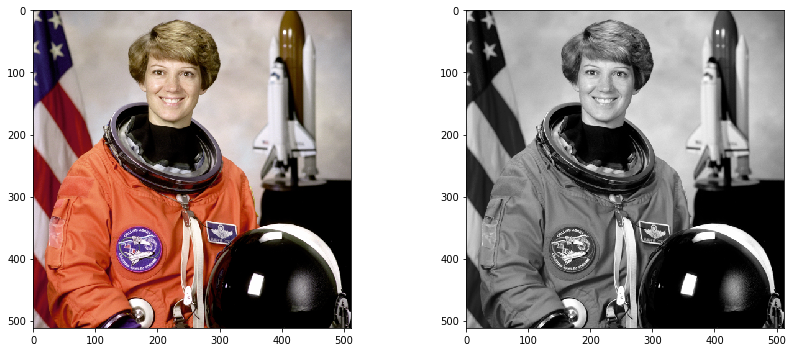

In [ ]:
#демонстрация изображений
fig=plt.figure(figsize=(15, 5))
fig.add_subplot(1,2,1)
imshow(img_color)
fig.add_subplot(1,2,2)
imshow(img_gray)
show()

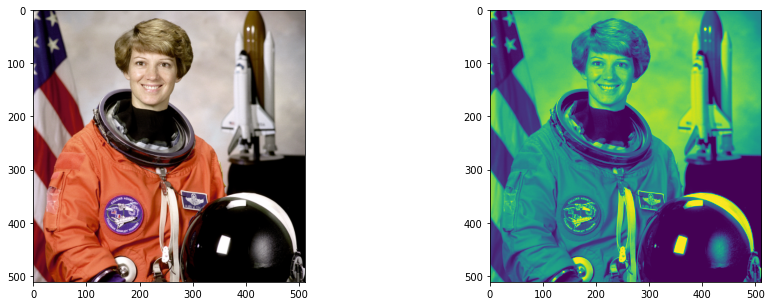

In [ ]:
#демонстрация - что будет c полутоновым изображением, если использовать функции вывода matplotlib
fig=plt.figure(figsize=(15, 5))
fig.add_subplot(1,2,1)
plt.imshow(img_color)
fig.add_subplot(1,2,2)
plt.imshow(img_gray)
show()
#изображение сине-зеленое, потому что вывведено в стандартной матплотлибовской палитре

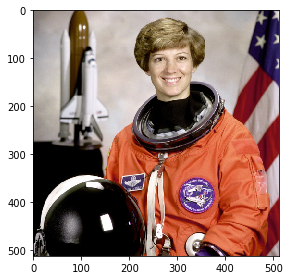

In [ ]:
#пример операции над изображениями - отражение по вертикали
rev = img_color[:,::-1,:]
imshow(rev)
show()

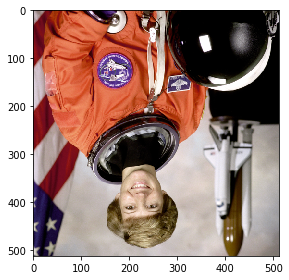

In [ ]:
#пример операции над изображениями - отражение по горизонтали
flip = np.flip(img_color,0)
imshow(flip)
show()

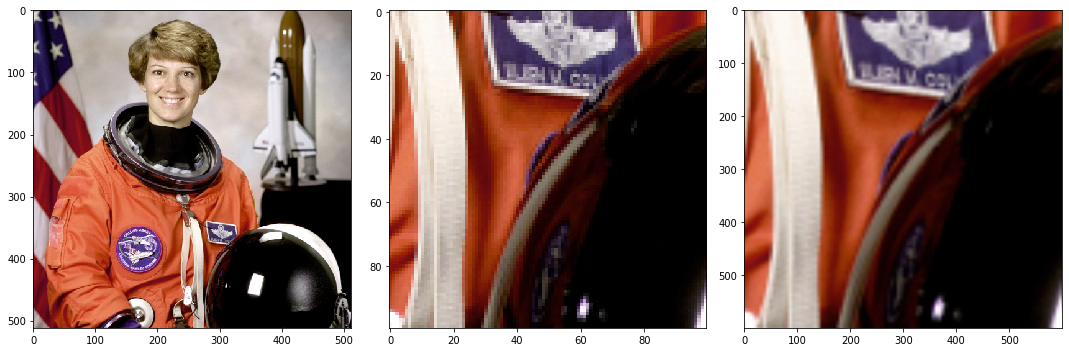

In [ ]:
#пример операции над изображениями - обрезка куска и его интерполяция
cut = img_color[350:450,250:350,:]
resized = resize(cut, (600,600))
fig=plt.figure(figsize=(15, 5))
fig.add_subplot(1,3,1)
imshow(img_color)
fig.add_subplot(1,3,2)
imshow(cut)
fig.add_subplot(1,3,3)
imshow(resized)
show()

#сохранение изображений на диск
#imsave("resized.png",resized)

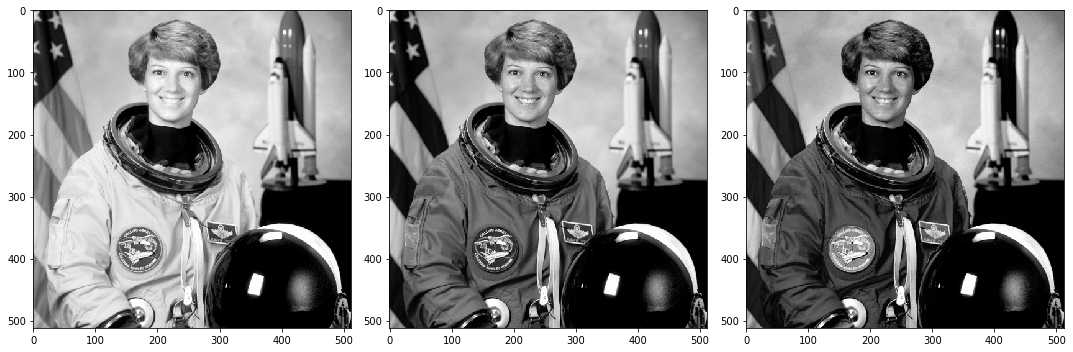

In [ ]:
#работа с каналами
red = img_color[:, :, 0]
green = img_color[:, :, 1]
blue = img_color[:, :, 2]
fig=plt.figure(figsize=(15, 5))
fig.add_subplot(1,3,1)
imshow(red)
fig.add_subplot(1,3,2)
imshow(green)
fig.add_subplot(1,3,3)
imshow(blue)
show()

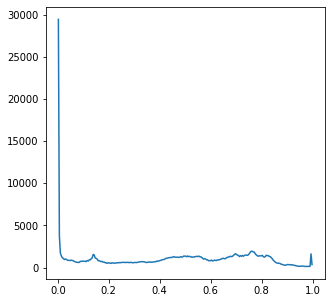

In [ ]:
#гистрограммы
img_hist_col, bins_col = histogram(img_color[:,:,0])
img_hist_gray, bins_gray = histogram(img_gray)
fig=plt.figure(figsize=(5, 5))
plt.plot(bins_gray, img_hist_gray)
plt.show()


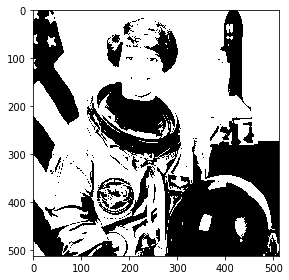

In [ ]:
#пороговая обработка
thr = img_gray*255 > 100 
imshow(thr)
show()

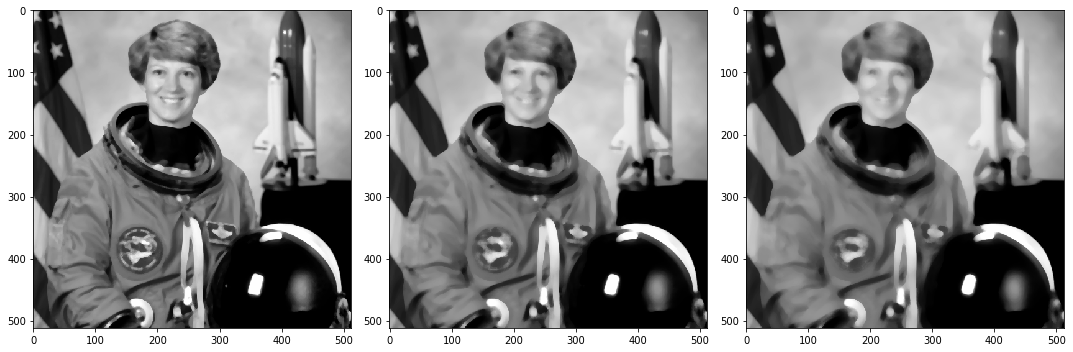

In [ ]:
#фильтрация - размытие медианным фильтром
median_3 = median(img_gray, disk(3))
median_5 = median(img_gray, disk(5))
median_7 = median(img_gray, disk(7))
fig=plt.figure(figsize=(15, 5))
fig.add_subplot(1,3,1)
imshow(median_3)
fig.add_subplot(1,3,2)
imshow(median_5)
fig.add_subplot(1,3,3)
imshow(median_7)
show()

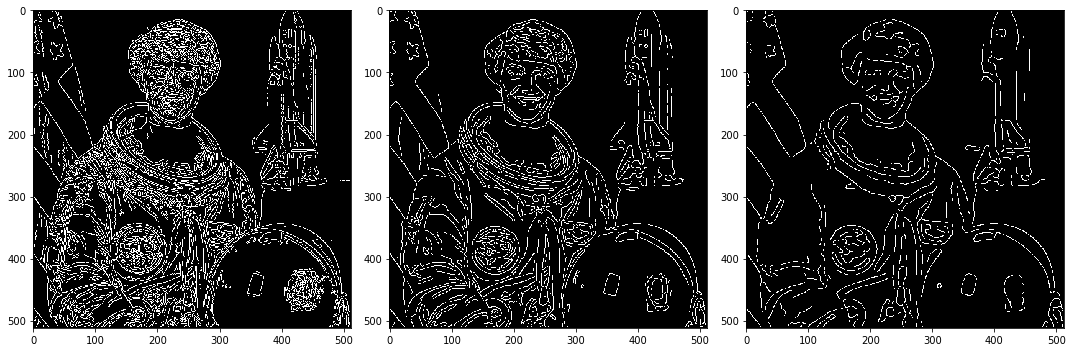

In [ ]:
#выделение контуров
contours_01 = canny(img_gray, sigma=0.1)
contpours_15 = canny(img_gray, sigma=1.5)
contours_30 = canny(img_gray, sigma=3)
fig=plt.figure(figsize=(15, 5))
fig.add_subplot(1,3,1)
imshow(contours_01)
fig.add_subplot(1,3,2)
imshow(contpours_15)
fig.add_subplot(1,3,3)
imshow(contours_30)
show()

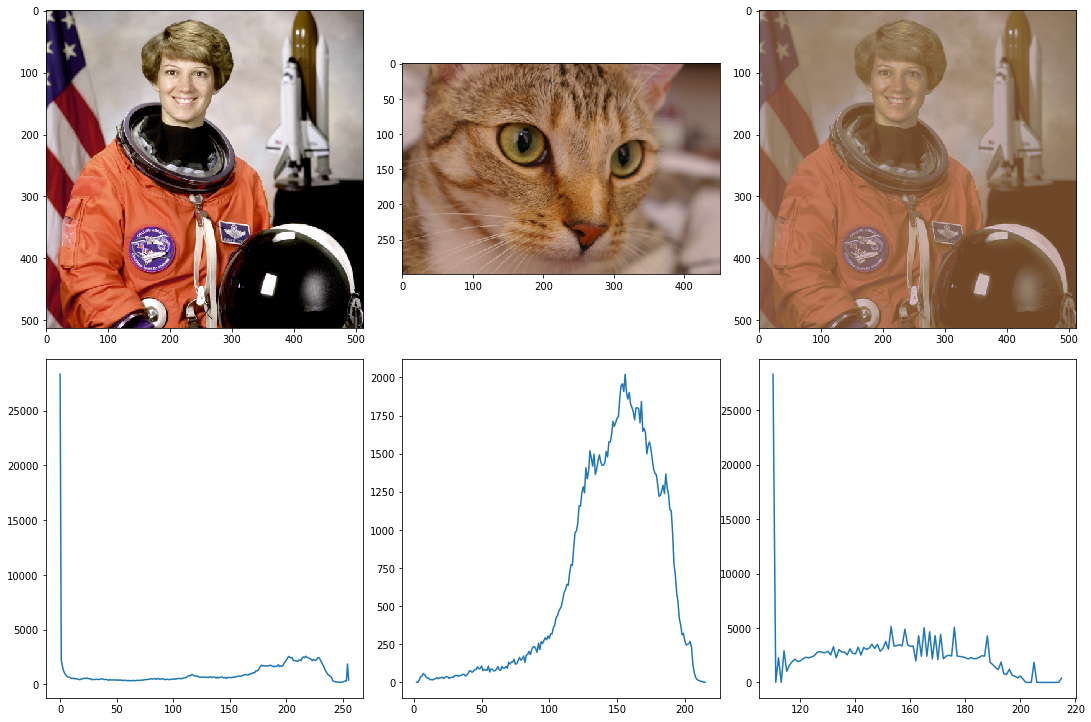

In [ ]:
#матчинг гистограм
reference = data.chelsea()
matched = match_histograms(img_color, reference, multichannel=True)
img_hist_src, bins_src = histogram(img_color[:,:,0])
img_hist_ref, bins_ref = histogram(reference[:,:,0])
img_hist_res, bins_res = histogram(matched[:,:,0])
fig=plt.figure(figsize=(15, 10))
fig.add_subplot(2,3,1)
imshow(img_color)
fig.add_subplot(2,3,2)
imshow(reference)
fig.add_subplot(2,3,3)
imshow(matched)
fig.add_subplot(2,3,4)
plt.plot(bins_src, img_hist_src)
fig.add_subplot(2,3,5)
plt.plot(bins_ref, img_hist_ref)
fig.add_subplot(2,3,6)
plt.plot(bins_res, img_hist_res)
show()